# **_Reinforcement Learning tools for Auto-Stock Trading_**  

### 1. Importing Necessary Libraries

In [76]:
#Basic Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline

C:\Users\Vansh\AppData\Local\Temp\ipykernel_15136\1738962341.py:5: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  matplotlib.use('Agg')


In [2]:
#Finrl utilities
from finrl import config
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import data_split
from finrl.agents.stablebaselines3.models import DRLAgent

C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\exchange_calendars\exchange_calendar.py:2347: FutureWarning: 'T' is deprecated and will be removed in a future version. Please use 'min' instead of 'T'.
  align: pd.Timedelta | str = pd.Timedelta(1, "T"),


In [3]:
#Processing Utilities
import datetime
import itertools


In [4]:
#Make finrl imports accessible
import sys
sys.path.append("../FinRL-Library")

In [5]:
#Setup libraries
from __future__ import annotations
#postponed evaluation of type annotations and evaluation available at runtime

In [6]:
#other imports will be used wherever applicable

In [7]:
#Symbols of BSE SENSEX30 whose data is to be downloaded
# symbols = [
#     'AXISBANK.BO', 'BAJAJ-AUTO.BO', 'BAJFINANCE.BO', 'BAJAJFINSV.BO',
#     'BHARTIARTL.BO', 'DRREDDY.BO', 'HCLTECH.BO', 'JSWSTEEL.BO', 'HDFCBANK.BO',
#     'HINDUNILVR.BO', 'ICICIBANK.BO', 'INDUSINDBK.BO', 'INFY.BO', 'ITC.BO',
#     'KOTAKBANK.BO', 'LT.BO', 'M&M.BO', 'MARUTI.BO', 'NESTLEIND.BO',
#     'NTPC.BO', 'ONGC.BO', 'POWERGRID.BO', 'RELIANCE.BO', 'SBIN.BO',
#     'SUNPHARMA.BO', 'TCS.BO', 'TECHM.BO', 'TITAN.BO', 'ULTRACEMCO.BO','ASIANPAINT.BO'
# ]


In [8]:
#Globally accesible training and trading s/e
TRAIN_START_DATE = '2010-01-01'
TRAIN_END_DATE = '2020-07-01'
TRADE_START_DATE = '2020-07-01'
TRADE_END_DATE = '2023-05-01'

In [9]:
#How we downloaded the data
# df_raw = YahooDownloader(start_date = TRAIN_START_DATE,
#                                 end_date = TRADE_END_DATE,
#                                 ticker_list = symbols).fetch_data()

### 2. Loading the Data

In [10]:
df_raw=pd.read_csv('datasets/dow30.csv')

In [11]:
df_raw.head()

,Unnamed: 0,date,open,high,low,close,volume,tic,day
0,0,2010-01-04,7.622500,7.660714,7.585000,6.470741,493729600,AAPL,0
1,1,2010-01-04,56.630001,57.869999,56.560001,41.493427,5277400,AMGN,0
2,2,2010-01-04,40.810001,41.099998,40.389999,33.090427,6894300,AXP,0
3,3,2010-01-04,55.720001,56.389999,54.799999,43.777550,6186700,BA,0
4,4,2010-01-04,57.650002,59.189999,57.509998,40.336727,7325600,CAT,0


In [12]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98273 entries, 0 to 98272
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  98273 non-null  int64  
 1   date        98273 non-null  object 
 2   open        98273 non-null  float64
 3   high        98273 non-null  float64
 4   low         98273 non-null  float64
 5   close       98273 non-null  float64
 6   volume      98273 non-null  int64  
 7   tic         98273 non-null  object 
 8   day         98273 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.7+ MB


### 3. Preprocessing the data

In [13]:
from finrl.config import INDICATORS
from dataprocessing import FeatureEngineer, load_dataset, data_split, convert_to_datetime

fe = FeatureEngineer(use_technical_indicator=True,
                      tech_indicator_list = INDICATORS,
                      use_vix=False,
                      use_turbulence=True,
                      user_defined_feature = False)

processed = fe.preprocess_data(df_raw)

Successfully added technical indicators
Successfully added turbulence index


In [14]:
processed

,Unnamed: 0,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,0,2010-01-04,7.622500,7.660714,7.585000,6.470741,493729600,AAPL,0,0.000000,6.492158,6.460513,100.000000,66.666667,100.000000,6.470741,6.470741,0.000000
1,1,2010-01-04,56.630001,57.869999,56.560001,41.493427,5277400,AMGN,0,0.000000,6.492158,6.460513,100.000000,66.666667,100.000000,41.493427,41.493427,0.000000
2,2,2010-01-04,40.810001,41.099998,40.389999,33.090427,6894300,AXP,0,0.000000,6.492158,6.460513,100.000000,66.666667,100.000000,33.090427,33.090427,0.000000
3,3,2010-01-04,55.720001,56.389999,54.799999,43.777550,6186700,BA,0,0.000000,6.492158,6.460513,100.000000,66.666667,100.000000,43.777550,43.777550,0.000000
4,4,2010-01-04,57.650002,59.189999,57.509998,40.336727,7325600,CAT,0,0.000000,6.492158,6.460513,100.000000,66.666667,100.000000,40.336727,40.336727,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98268,98268,2023-04-28,488.690002,493.959991,488.119995,484.607697,2398400,UNH,4,0.786764,521.631214,462.288110,50.336840,1.897772,2.176653,483.541471,477.208810,16.376522
98269,98269,2023-04-28,228.649994,233.570007,228.059998,230.918076,11627900,V,4,2.011149,234.571334,222.464486,57.280181,66.809958,11.715616,225.404010,223.491694,16.376522
98270,98270,2023-04-28,38.560001,39.000000,38.459999,36.730484,19194400,VZ,4,-0.010362,38.220056,34.784002,52.962088,38.454379,5.049905,36.043551,36.149906,16.376522
98271,98271,2023-04-28,35.139999,35.380001,34.959999,32.945930,11878500,WBA,4,0.103479,34.054575,32.260677,50.032593,31.130480,1.197112,32.470512,32.780687,16.376522


In [15]:
df=processed

In [16]:
list_ticker = df["tic"].unique().tolist()
# only apply to daily level data, need to fix for minute level
list_date = list(pd.date_range(df['date'].min(),df['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

df_full = pd.DataFrame(combination,columns=["date","tic"]).merge(df,on=["date","tic"],how="left")
df_full = df_full[df_full['date'].isin(df['date'])]
df_full = df_full.sort_values(['date','tic'])
df_full = df_full.fillna(1)

In [17]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100590 entries, 0 to 145888
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          100590 non-null  object 
 1   tic           100590 non-null  object 
 2   Unnamed: 0    100590 non-null  float64
 3   open          100590 non-null  float64
 4   high          100590 non-null  float64
 5   low           100590 non-null  float64
 6   close         100590 non-null  float64
 7   volume        100590 non-null  float64
 8   day           100590 non-null  float64
 9   macd          100590 non-null  float64
 10  boll_ub       100590 non-null  float64
 11  boll_lb       100590 non-null  float64
 12  rsi_30        100590 non-null  float64
 13  cci_30        100590 non-null  float64
 14  dx_30         100590 non-null  float64
 15  close_30_sma  100590 non-null  float64
 16  close_60_sma  100590 non-null  float64
 17  turbulence    100590 non-null  float64
dtypes: float6

In [18]:
df=df_full

In [19]:
df.head()

,date,tic,Unnamed: 0,open,high,low,close,volume,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,turbulence
0,2010-01-04,AAPL,0.0,7.622500,7.660714,7.585000,6.470741,493729600.0,0.0,0.0,6.492158,6.460513,100.0,66.666667,100.0,6.470741,6.470741,0.0
1,2010-01-04,AMGN,1.0,56.630001,57.869999,56.560001,41.493427,5277400.0,0.0,0.0,6.492158,6.460513,100.0,66.666667,100.0,41.493427,41.493427,0.0
2,2010-01-04,AXP,2.0,40.810001,41.099998,40.389999,33.090427,6894300.0,0.0,0.0,6.492158,6.460513,100.0,66.666667,100.0,33.090427,33.090427,0.0
3,2010-01-04,BA,3.0,55.720001,56.389999,54.799999,43.777550,6186700.0,0.0,0.0,6.492158,6.460513,100.0,66.666667,100.0,43.777550,43.777550,0.0
4,2010-01-04,CAT,4.0,57.650002,59.189999,57.509998,40.336727,7325600.0,0.0,0.0,6.492158,6.460513,100.0,66.666667,100.0,40.336727,40.336727,0.0


In [20]:
df.shape

(100590, 18)

### 4.Splitting Training and Trading Data

In [21]:
train = data_split(df, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(df, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))
     

79230
21360


In [22]:
train.to_csv('train_data.csv')
trade.to_csv('trade_data.csv')

### 5. Construction of Trading Environment

In [23]:
from TradingEnv import StockTradingEnv

In [24]:


# Set the corresponding values to 'True' for the algorithms that you want to use
if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

### Testing A2C

In [25]:
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

trained_a2c = A2C.load("trained_models/agent_a2c") if if_using_a2c else None

In [26]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [27]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [28]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [29]:
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_a2c, 
    environment = e_trade_gym) if if_using_a2c else (None, None)

hit end!


In [30]:
df_account_value_a2c.tail()

,date,account_value
707,2023-04-24,110842.142310
708,2023-04-25,110879.366938
709,2023-04-26,109320.272750
710,2023-04-27,109210.979206
711,2023-04-28,109525.696601


In [31]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_a2c)
perf_stats_all = pd.DataFrame(perf_stats_all)


C:\Users\Vansh\anaconda3\envs\tf_gpu\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


==============Get Backtest Results===========
Annual return          0.032728
Cumulative returns     0.095257
Annual volatility      0.151529
Sharpe ratio           0.288459
Calmar ratio           0.256417
Stability              0.459118
Max drawdown          -0.127636
Omega ratio            1.050604
Sortino ratio          0.414264
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.929860
Daily value at risk   -0.018917
dtype: float64


## Testing DDPG

In [32]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [33]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [34]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [35]:
trained_ddpg = DDPG.load("trained_models/agent_ddpg") if if_using_ddpg else None

In [36]:
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_ddpg, 
    environment = e_trade_gym) if if_using_ddpg else (None, None)

hit end!


In [37]:
df_account_value_ddpg.tail()

,date,account_value
707,2023-04-24,101843.757576
708,2023-04-25,100610.587482
709,2023-04-26,99298.173313
710,2023-04-27,99198.894928
711,2023-04-28,100284.544243


In [38]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ddpg)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return          0.001006
Cumulative returns     0.002845
Annual volatility      0.155813
Sharpe ratio           0.084476
Calmar ratio           0.003285
Stability              0.213821
Max drawdown          -0.306327
Omega ratio            1.014669
Sortino ratio          0.114833
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.909337
Daily value at risk   -0.019578
dtype: float64


## Testing PPO

In [39]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [40]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [41]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [42]:
trained_ppo = PPO.load("trained_models/agent_ppo") if if_using_ppo else None

In [43]:
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_ppo, 
    environment = e_trade_gym) if if_using_ppo else (None, None)

hit end!


In [44]:
df_account_value_ppo.tail()

,date,account_value
707,2023-04-24,101219.252071
708,2023-04-25,99842.119073
709,2023-04-26,100458.263584
710,2023-04-27,100357.814305
711,2023-04-28,100732.371259


In [45]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_ppo)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return          0.002586
Cumulative returns     0.007324
Annual volatility      0.163097
Sharpe ratio           0.097537
Calmar ratio           0.009331
Stability              0.103065
Max drawdown          -0.277143
Omega ratio            1.017387
Sortino ratio          0.133534
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.015672
Daily value at risk   -0.020485
dtype: float64


## Testing TD3

In [46]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [47]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [48]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [49]:
trained_td3 = TD3.load("trained_models/agent_td3") if if_using_td3 else None

In [50]:
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_td3, 
    environment = e_trade_gym) if if_using_td3 else (None, None)

hit end!


In [51]:
df_account_value_td3.tail()

,date,account_value
707,2023-04-24,107259.499649
708,2023-04-25,105552.521927
709,2023-04-26,104405.525147
710,2023-04-27,104301.119652
711,2023-04-28,105293.671124


In [58]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_td3)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return          0.018425
Cumulative returns     0.052937
Annual volatility      0.179811
Sharpe ratio           0.191412
Calmar ratio           0.060945
Stability              0.104646
Max drawdown          -0.302317
Omega ratio            1.034288
Sortino ratio          0.273838
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.932473
Daily value at risk   -0.022518
dtype: float64


## Testing SAC

In [52]:
stock_dimension = len(trade.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 30, State Space: 301


In [53]:
buy_cost_list = sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 100000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
}

In [54]:
e_trade_gym = StockTradingEnv(df = trade, turbulence_threshold = 70, **env_kwargs)
env_trade, obs_trade = e_trade_gym.get_sb_env()

In [55]:
trained_sac = SAC.load("trained_models/agent_sac") if if_using_sac else None

In [56]:
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_sac, 
    environment = e_trade_gym) if if_using_sac else (None, None)

hit end!


In [57]:
df_account_value_sac.tail()

,date,account_value
707,2023-04-24,98049.248972
708,2023-04-25,97302.791655
709,2023-04-26,96043.393216
710,2023-04-27,95947.358599
711,2023-04-28,96418.195782


In [59]:
from finrl.plot import backtest_stats
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value_sac)
perf_stats_all = pd.DataFrame(perf_stats_all)


==============Get Backtest Results===========
Annual return         -0.012827
Cumulative returns    -0.035818
Annual volatility      0.135708
Sharpe ratio          -0.027351
Calmar ratio          -0.061953
Stability              0.367685
Max drawdown          -0.207042
Omega ratio            0.995255
Sortino ratio         -0.037261
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.896503
Daily value at risk   -0.017112
dtype: float64


In [82]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0]) if if_using_a2c else None
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0]) if if_using_ddpg else None
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0]) if if_using_ppo else None
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0]) if if_using_td3 else None
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0]) if if_using_sac else None

result = pd.DataFrame()
if if_using_a2c: result = pd.merge(result, df_result_a2c, how='outer', left_index=True, right_index=True)
if if_using_ddpg: result = pd.merge(result, df_result_ddpg, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))
if if_using_ppo: result = pd.merge(result, df_result_ppo, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))
if if_using_td3: result = pd.merge(result, df_result_td3, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))
if if_using_sac: result = pd.merge(result, df_result_sac, how='outer', left_index=True, right_index=True, suffixes=('', '_drop'))


In [83]:
col_name = []
col_name.append('A2C') if if_using_a2c else None
col_name.append('DDPG') if if_using_ddpg else None
col_name.append('PPO') if if_using_ppo else None
col_name.append('TD3') if if_using_td3 else None
col_name.append('SAC') if if_using_sac else None

result.columns = col_name

In [84]:
result

,A2C,DDPG,PPO,TD3,SAC
date,,,,,
2020-07-01,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
2020-07-02,100553.537518,100448.511780,100238.121948,100456.915400,100295.710351
2020-07-06,101174.261452,101611.750200,101589.787169,101742.465007,101050.040357
2020-07-07,99726.235364,100195.673834,99252.174355,100409.416743,100362.546173
2020-07-08,99819.479890,100761.002771,99884.127214,100979.152263,100371.325825
...,...,...,...,...,...
2023-04-24,110842.142310,101843.757576,101219.252071,107259.499649,98049.248972
2023-04-25,110879.366938,100610.587482,99842.119073,105552.521927,97302.791655
2023-04-26,109320.272750,99298.173313,100458.263584,104405.525147,96043.393216


<Axes: xlabel='date'>

<Figure size 1500x500 with 0 Axes>

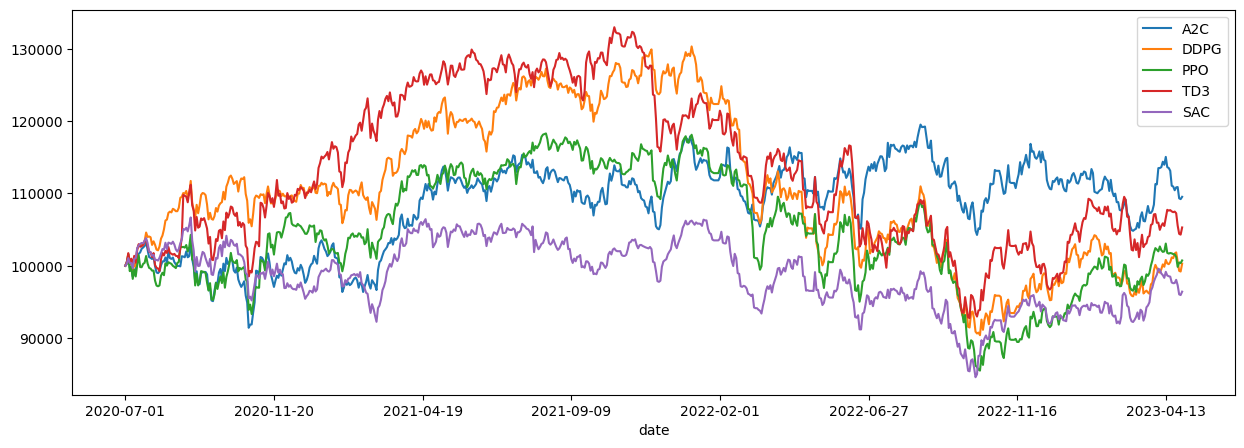

In [85]:
plt.rcParams["figure.figsize"] = (15,5)
plt.figure()
result.plot()